In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df[df["TotalCharges"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [18]:
df.info() # 자료의 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [19]:
# 수치형 데이터으로 바꿔주기
# object 타입인 TotalCharges를 바로 int나 float으로 변환하려고 하면 오류가 생김
# 공백(.str.strip())을 제거하고 공백문자를 nan으로 바꿔준 후에 float으로 변환합니다.
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


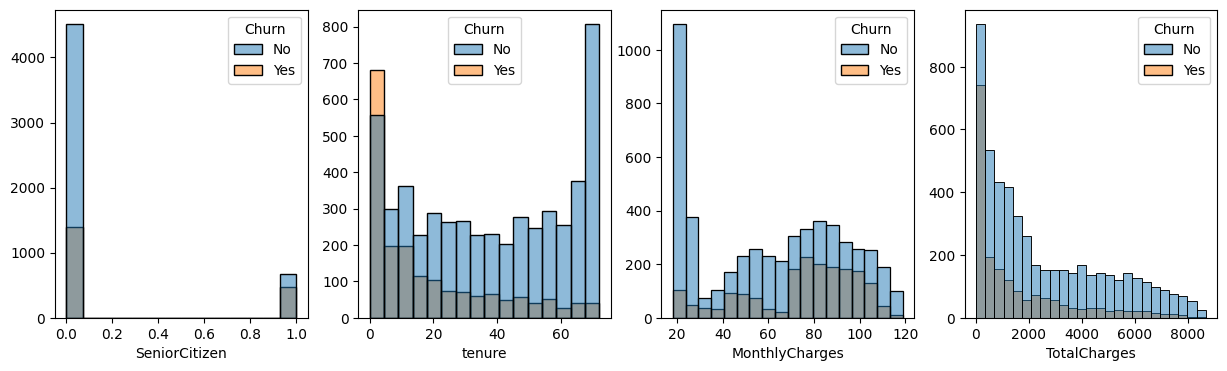

In [21]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

cols = df.describe().columns[:].tolist(); cols

for i, col_name in enumerate(cols):    
    sns.histplot(data=df, x=col_name, hue="Churn", ax=axes[i], color="red", alpha=0.5)
    axes[i].set_ylabel('')

# histplot 에는 ylabel 파라미터가 없음. axes[i].set_ylabel('')사용. matplotlib의 Axes 클래스
# seaborn 으로 그래프를 그리는데 ylabel값 설정은 matplotlib에서????

In [22]:
# Churn 확률 
df["Churn"].value_counts(normalize=True)

# 약 26% 이탈, 약 73% 유지

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [23]:
cat_num = df.nunique() # 레이블의 갯수 확인하기 위한 nunique
# 데이터의 범주가 5개보다 적은 것만 추출
# 전부 다 그리면 이상하게 나오는 것들이 있음. 
# tenure - 73개, MonthlyCharges - 1585개, TotalCharges - 6530개
category = cat_num[cat_num < 5].index.tolist()
category; df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

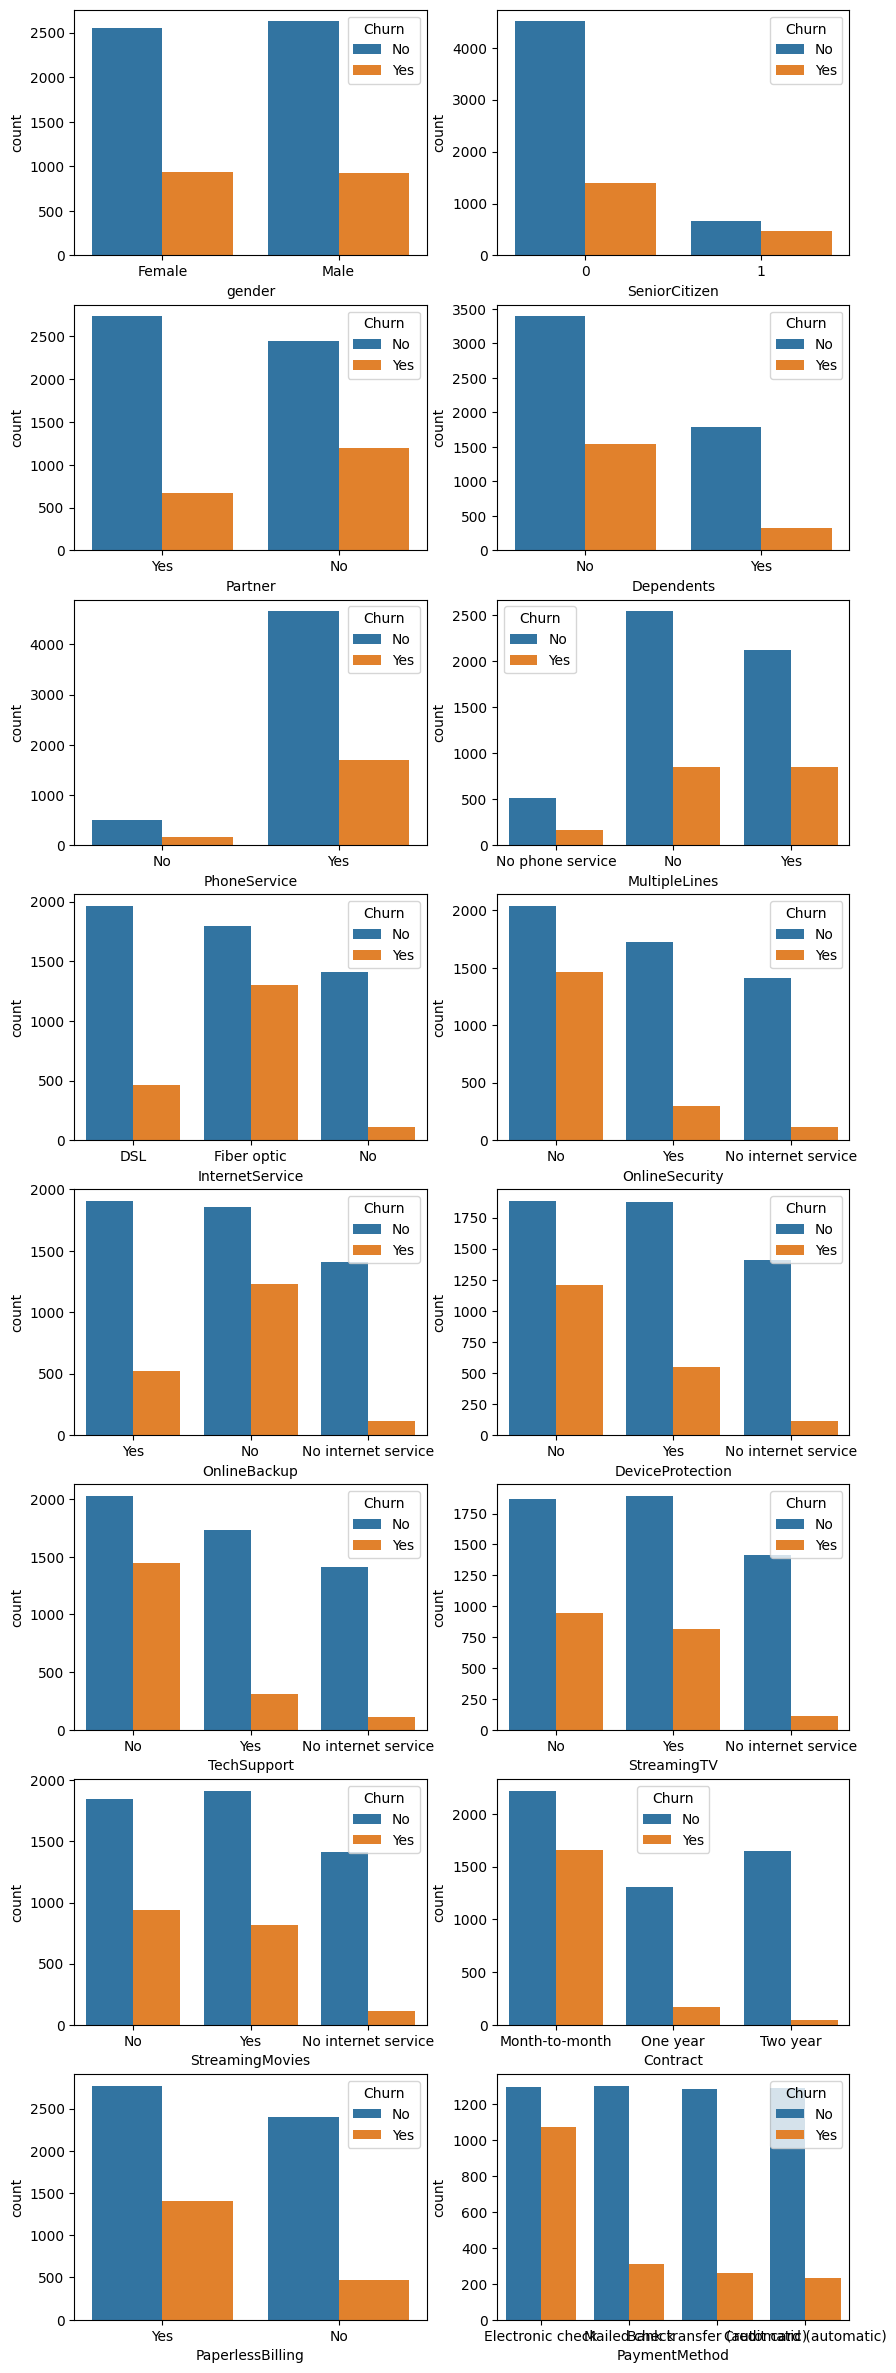

In [24]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,30))

df_cols = category[:-1] # hue 값은 Churn 하나만 제외

for i, xline in enumerate(df_cols):
    row = i//2
    col = i%2
    sns.countplot(data=df, x=xline, hue="Churn",ax=axes[row][col])


그래프를 봤을 때 작관적으로 rough 하게 해석할 수 있는 부분.
1. InternetService - FiberOptic, 
   OnelineSecurity - No,
   DeviceProtection - No,
   TechSupport - No,
   Contract - Month-to-Month,
   PaymentMethod - Electronic check
   부분에서 다른 조건 대비 이탈 비율이 높게 나타남.
   ??? 이를 어떤 조건 하에서 Churn의 비율이 어떻게 나타나는지?


## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [25]:
# 수치형 자료들과의 상관계수 구하기

df_corr = df.select_dtypes(include="number").corr(); df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

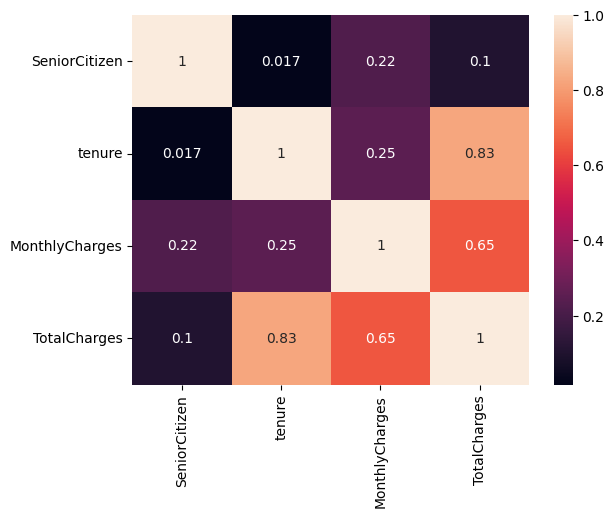

In [26]:
# 히트맵 그리기
sns.heatmap(df_corr, annot=True)

#tenure - TotalCharges (0.83), MonthlyCharges - TotalCharges (0.65)  --> 상관성이 있을 확률이 높음

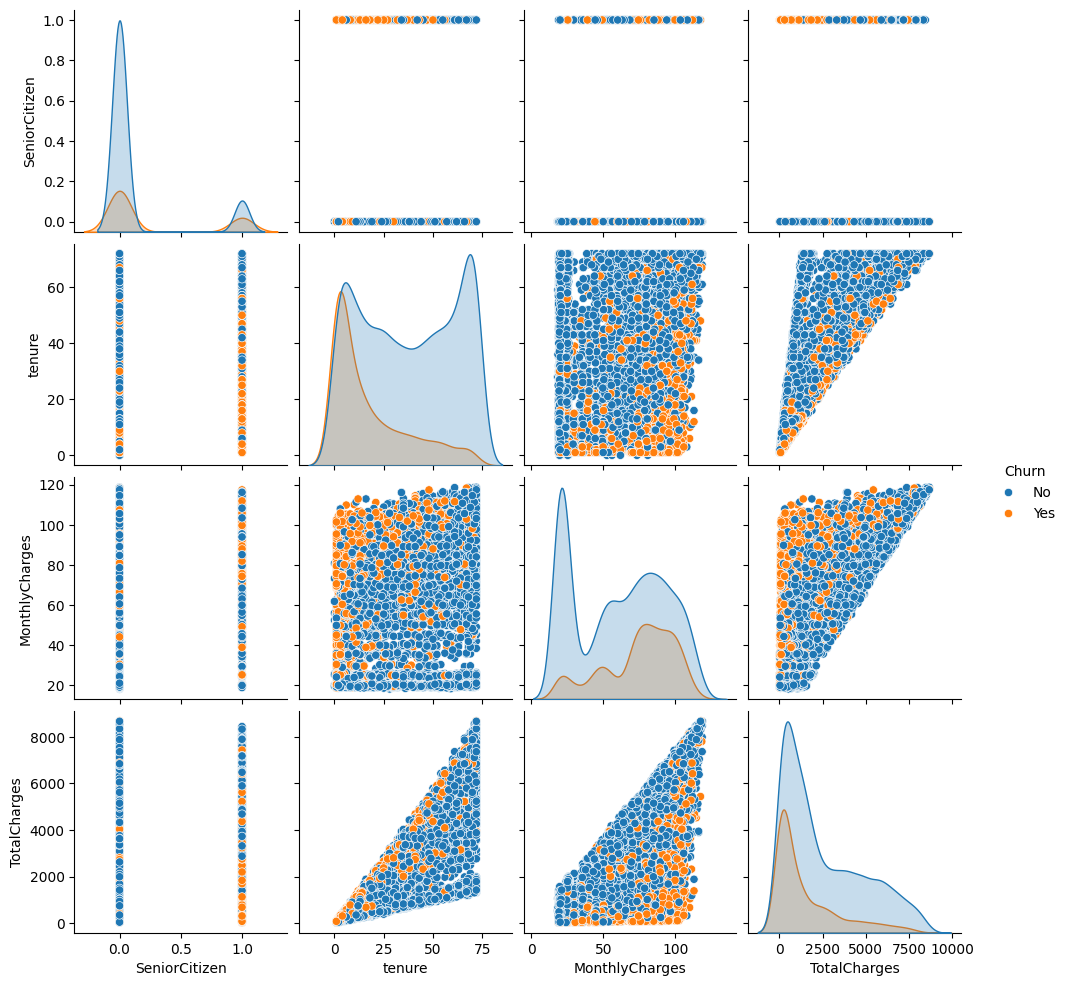

In [27]:
sns.pairplot(data=df, hue="Churn")

그래프 해석을 어떻게 해야할지????

tenure - tenure 상관관계 그래프에서 

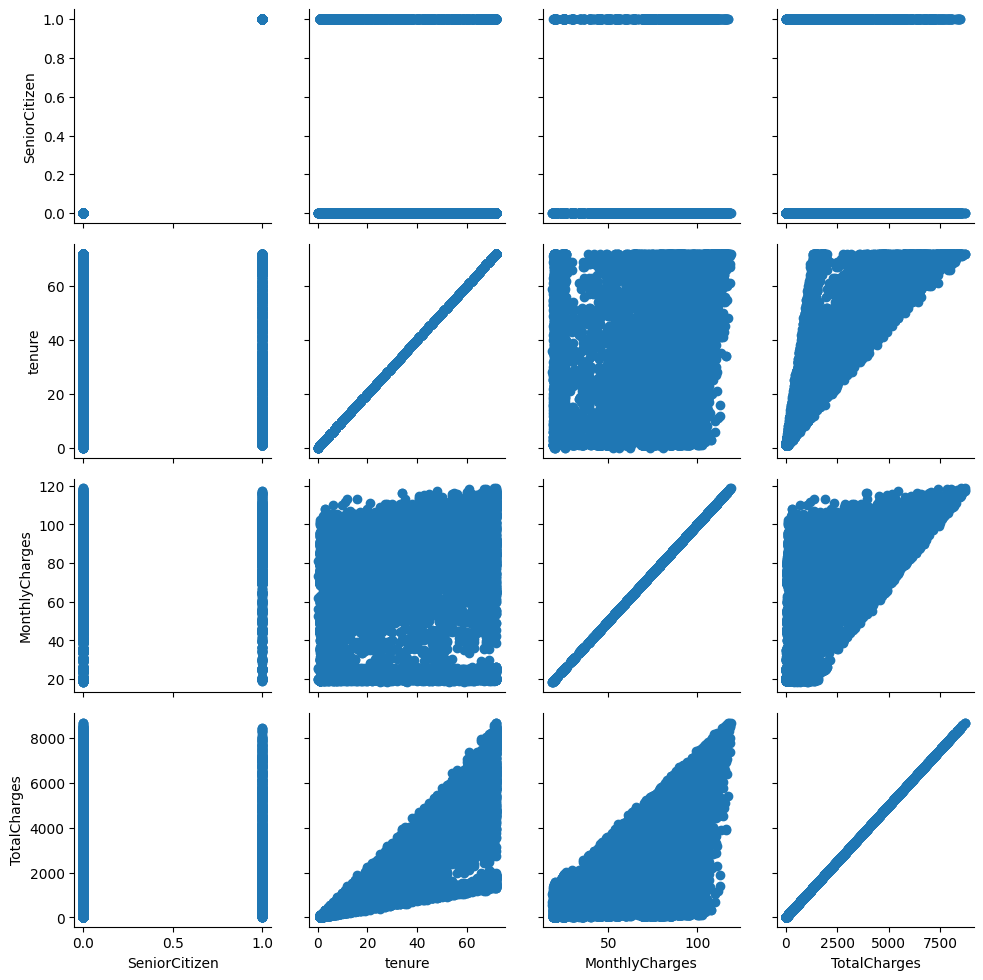

In [28]:
graph = sns.PairGrid(data=df.select_dtypes(include="number"))
graph.map(plt.scatter)

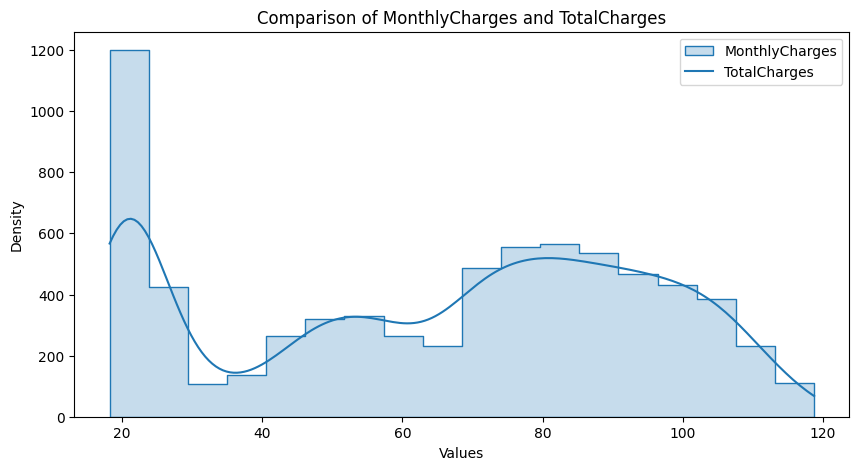

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['MonthlyCharges', 'TotalCharges']], kde=True, element="step", common_norm=False)
plt.title('Comparison of MonthlyCharges and TotalCharges')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(labels=['MonthlyCharges', 'TotalCharges'])
plt.show()

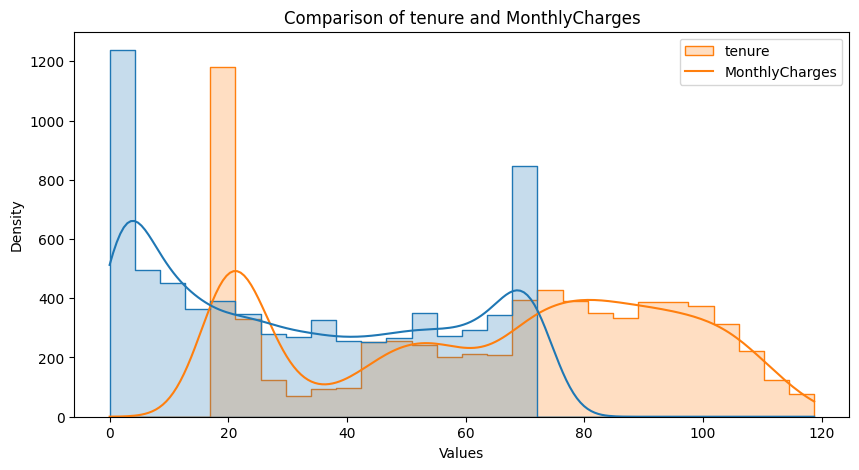

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['tenure', 'MonthlyCharges']], kde=True, element="step", common_norm=False)
plt.title('Comparison of tenure and MonthlyCharges')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(labels=['tenure', 'MonthlyCharges'])
plt.show()